### Hello all in this notebook i will be doing EDA On the Electric vehicle population data, i have used various visualizations to represent data in an appealing way, Please do leave an upvote if you like my work

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import plot_tree



In [14]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')


In [15]:
total_electric = df.pivot_table(columns=['Model Year'], aggfunc='size')
print(total_electric)

Model Year
1997        1
1999        2
2000        5
2008       11
2010       15
2011      425
2012      860
2013     2370
2014     1896
2015     2559
2016     2856
2017     4503
2018     7278
2019     5265
2020     5682
2021     9228
2022    13559
2023      930
dtype: int64


In [17]:
Ncars = total_electric.reset_index()
Ncars = Ncars.rename(columns={"Model Year": "year", 0: "total_cars"})
# Drop 2023 cause there are not enough values
Ncars = Ncars.drop([0, 10])
Ncars

,year,total_cars
1,1999,2
2,2000,5
3,2008,11
4,2010,15
5,2011,425
6,2012,860
7,2013,2370
8,2014,1896
9,2015,2559
11,2017,4503


In [19]:
#Store columns in x and y variables
x = Ncars["year"]
y = Ncars["total_cars"]

In [20]:
X_train = x.to_numpy()
y_train = y.to_numpy()
X_train= X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [23]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [30]:
model = xgb.train(params, dtrain, num_boost_round=100)


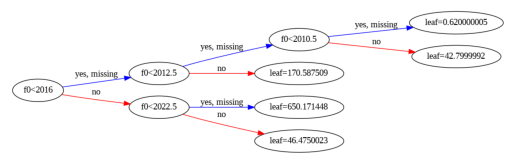

In [31]:
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()